In [1]:
# ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
# RNN, LSTM, GRU.
model_type = "GRU"
# Bidirectional
isBidirectional = "true" # "true" / "false"
# Epoch, batch
epoch_qty = 1000 #300
batch_qty = 300 #100
# ES

# Hidden Layer Amount
units = 50

In [3]:
#2. データを準備する
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                     size=len(x))
    return sin(x) + noise

T = 100
f = toy_problem(T).astype(np.float32)
length_of_sequences = len(f)

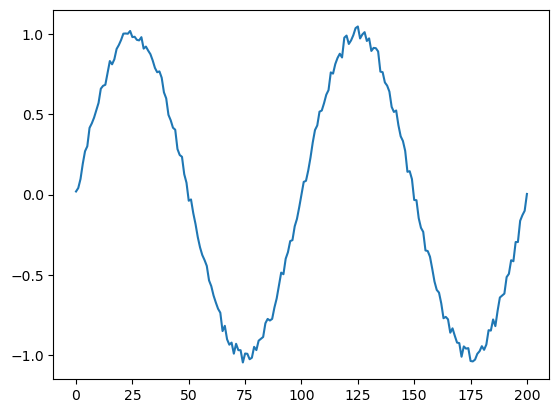

In [4]:
#3.データの確認
plt.plot(range(length_of_sequences), f)
plt.show()

In [5]:
#4. 教師データと評価データを作成
maxlen = 25

x = []
t = []

for i in range(length_of_sequences - maxlen):
    x.append(f[i:i+maxlen])
    t.append(f[i+maxlen])

x = np.array(x).reshape(-1, maxlen, 1)
t = np.array(t).reshape(-1, 1)

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.2, shuffle=True)

In [6]:
# モデルの構築
model = Sequential()
if model_type == "LSTM":
    if isBidirectional == "true":
        model.add(Bidirectional(LSTM(units, activation='tanh',
               recurrent_activation='sigmoid',
               kernel_initializer='glorot_normal',
               recurrent_initializer='orthogonal')))
    else:
        model.add(LSTM(units, activation='tanh',
               recurrent_activation='sigmoid',
               kernel_initializer='glorot_normal',
               recurrent_initializer='orthogonal'))   
elif model_type == "GRU":
    if isBidirectional == "true":
        model.add(Bidirectional(GRU(units, activation='tanh',
               recurrent_activation='sigmoid',
               kernel_initializer='glorot_normal',
               recurrent_initializer='orthogonal')))
    else:        
        model.add(GRU(units, activation='tanh',
               recurrent_activation='sigmoid',
               kernel_initializer='glorot_normal',
               recurrent_initializer='orthogonal'))  
else:
    if isBidirectional == "true":
        model.add(Bidirectional(SimpleRNN(units, activation='tanh',
               recurrent_activation='sigmoid',
               kernel_initializer='glorot_normal',
               recurrent_initializer='orthogonal')))
    else:
        model.add(SimpleRNN(units, activation='tanh',
                kernel_initializer='glorot_normal',
                recurrent_initializer='orthogonal'))

model.add(Dense(1, activation='linear'))
optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
                  loss='mean_squared_error')

In [7]:
#6.学習
es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       mode="auto")
hist = model.fit(x_train, t_train,
                 epochs=epoch_qty, batch_size=batch_qty,
                 verbose=2,
                 validation_data=(x_val, t_val),
                 callbacks=[es]
                )

Epoch 1/1000
1/1 - 4s - loss: 0.9126 - val_loss: 0.6953 - 4s/epoch - 4s/step
Epoch 2/1000
1/1 - 0s - loss: 0.8667 - val_loss: 0.6564 - 73ms/epoch - 73ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.8243 - val_loss: 0.6206 - 66ms/epoch - 66ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.7849 - val_loss: 0.5876 - 65ms/epoch - 65ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.7484 - val_loss: 0.5572 - 62ms/epoch - 62ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.7143 - val_loss: 0.5290 - 54ms/epoch - 54ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.6824 - val_loss: 0.5028 - 66ms/epoch - 66ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.6523 - val_loss: 0.4782 - 67ms/epoch - 67ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.6237 - val_loss: 0.4550 - 64ms/epoch - 64ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.5964 - val_loss: 0.4329 - 61ms/epoch - 61ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.5699 - val_loss: 0.4118 - 54ms/epoch - 54ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.5442 - val_loss: 0.3914 - 67ms/epoch - 67ms/step
Epoch 13/1000
1/1 - 0s - loss

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


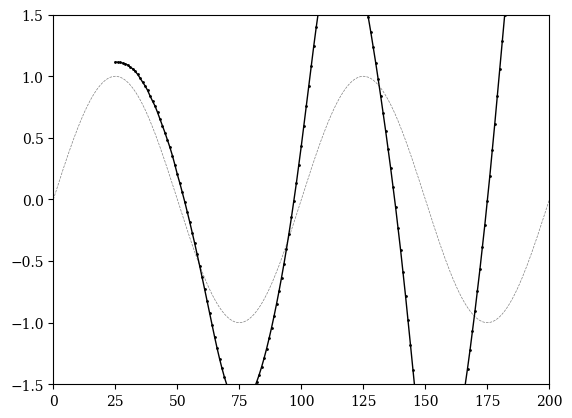

In [8]:
#7.モデルの評価
sin = toy_problem(T, ampl=0.)
gen = [None for i in range(maxlen)]

z = x[:1]

# 逐次的に予測値を求める
for i in range(length_of_sequences - maxlen):
    preds = model.predict(z[-1:])
    z = np.append(z, preds)[1:]
    z = z.reshape(-1, maxlen, 1)
    gen.append(preds[0, 0])

# 予測値を可視化
plt.rc('font', family='serif')
plt.xlim([0, 2*T])
plt.ylim([-1.5, 1.5])
plt.plot(range(len(f)), sin,
         color='gray',
         linestyle='--', linewidth=0.5)
plt.plot(range(len(f)), gen,
         color='black', linewidth=1,
         marker='o', markersize=1, markerfacecolor='black',
         markeredgecolor='black')
plt.show()